In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist_dataset = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data() ##Cargar el dataset

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

##LeNet5

Pre procesamiento de las imágenes

In [ ]:
#Aumentar una dimensión a las imágenes de entrada
x_train = x_train.reshape(x_train.shape[0], 28,28,1) #El 1 es la dimensión que se aumenta
#Se aumenta una dimensión porque la entrada LeNet es 32x32x1, está dimensión es conocida como depth
#Las imágenes a color están compuestas por 3 dimensiones (RGB)
#Por tanto, una imagen a color tiene profundidad 3
#Una imagen en escala de grises tiene solamente 1 dimensión
x_test = x_test.reshape(x_test.shape[0],28,28,1)


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
#Convertir de 28x28 a 32x32
x_train = np.pad(x_train,((0,0),(2,2),(2,2),(0,0)),'constant')
#Estoy diciendo que quiero que coloque dos 0 a la izquierda. dos 0 a la derecha
#Luego dos 2, arriba y abajo
x_test = np.pad(x_test,((0,0),(2,2),(2,2),(0,0)),'constant')

In [ ]:
x_train.shape

(60000, 32, 32, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 1)

In [ ]:
#Normalizar las imágenes
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#Preservar los valores originales para no perderlos al hacer one hot encoding
y_test_original = y_test
y_train_original = y_train

In [ ]:
#Comprobar la cantidad de categorías, observando los valores únicos
np.unique(y_test_original)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#Cuantos labels hay en y_test?
len(np.unique(y_test_original))

10

Observamos 10 categorías, que luego usaremos como parámetro para keras.categorical

In [ ]:
#Visualizar un valor de y_test
y_test_original[100]

6

In [ ]:
#Aplicar one hot-encoding a los labels de entrenamiento y de testeo
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [ ]:
y_test[100]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

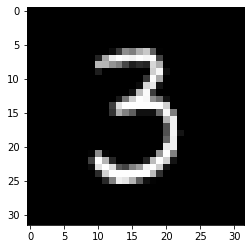

In [ ]:
#Visualizar una imagen
plt.imshow(np.squeeze(x_train[50]),cmap='gray') #np squeeze elimina aquellas dimensiones planas, pues keras no lo acepta

In [ ]:
y_train[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

##Modelo de Red

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=6 , kernel_size=(5,5) , activation='tanh', input_shape=(32,32,1)),
    keras.layers.AveragePooling2D(),

    keras.layers.Conv2D(filters=16, kernel_size=(5,5),activation='tanh'),
    keras.layers.AveragePooling2D(),

    keras.layers.Flatten(),

    keras.layers.Dense(units=120, activation = 'tanh'),
    keras.layers.Dense(units=84, activation = 'tanh'),
    keras.layers.Dense(units=10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']) #El optimizador es el algoritmo con el cual va a aprender los pesos, el algoritmo con el que se va a entrenar a la red

In [ ]:
model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1) #batch size indica cada cuántas muestras se actualizan los pesos
                                                                        #epoch indica cuántas veces volverá a entrenarse sobre el dataset
                                                                        #verbose muestra el proceso del entrenamiento

Epoch 1/10
469/469 [==============================] - 30s 62ms/step - loss: 0.3240 - accuracy: 0.9081
Epoch 2/10
469/469 [==============================] - 31s 66ms/step - loss: 0.1188 - accuracy: 0.9642
Epoch 3/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0769 - accuracy: 0.9768
Epoch 4/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0564 - accuracy: 0.9824
Epoch 5/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0450 - accuracy: 0.9861
Epoch 6/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0373 - accuracy: 0.9886
Epoch 7/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 8/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0256 - accuracy: 0.9919
Epoch 9/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0206 - accuracy: 0.9935
Epoch 10/10
469/469 [==============================] - 31s 66ms/step - loss: 0.017

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.0408 - accuracy: 0.9862
0.9861999750137329


In [ ]:
#Probar el modelo
#Expandir la dimensión para que la entrada sea 4D
x = x_test[100]
x = np.expand_dims(x, axis=0)
model.predict(x)

1/1 [==============================] - 0s 234ms/step


array([[4.8407746e-05, 4.5811426e-09, 7.7425355e-08, 7.2571986e-08,
        3.8199170e-07, 2.8186752e-05, 9.9991548e-01, 1.7889246e-08,
        7.3351921e-06, 1.1894047e-09]], dtype=float32)

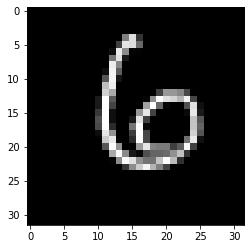

In [ ]:
#Visualizar una imagen
plt.imshow(np.squeeze(x_test[100]),cmap='gray')

In [ ]:
y_test_original[100]

6